In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel(r'C:\Users\vaibhav\Desktop\schneider\ContinuousMotion_Data_Horizontalsetup.xlsx')

In [3]:
df

,Pow_100,Pow_200,Pow_300,Pow_400,Pow_500,Pow_600,Pow_700,Pow_800,Pow_900,Pow_1000,Pow_1100,Pow_1200,Pow_1300,Pow_1400,Pow_1500,Pow_1600,Pow_1700,Pow_1800,Pow_1900,Pow_2000
0,0.210,1.557,1.860,3.859,5.300,2.970,3.424,6.625,4.392,8.365000,4.320000,6.072000,8.744999,7.905,15.911999,12.314,15.749999,18.054001,20.286001,15.548001
1,0.210,1.557,1.860,3.859,5.300,2.970,3.424,6.625,4.392,8.365000,4.320000,6.072000,8.744999,7.905,15.911999,12.314,15.749999,18.054001,20.286001,15.548001
2,0.286,1.341,1.860,3.859,4.020,3.164,3.328,6.625,4.158,8.014999,10.943999,5.808000,8.744999,7.905,12.954000,13.886,13.600000,18.054001,20.286001,15.548001
3,0.286,1.341,1.730,3.230,4.020,3.165,3.328,5.300,4.158,8.014999,10.943999,5.808000,8.217000,7.874,12.954000,13.886,13.600000,17.582001,19.467001,16.483999
4,0.858,1.490,1.730,3.230,3.819,4.642,5.408,5.300,7.392,7.786000,10.943999,9.921999,8.217000,7.874,12.954000,13.886,15.232000,17.582001,19.467001,16.483999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,0.900,1.548,2.064,3.072,3.705,3.864,4.704,5.724,4.536,7.094999,8.208000,9.204000,9.417001,11.270,12.250000,1.177,15.512000,16.815001,17.856001,16.463999
44996,0.900,1.548,2.064,3.072,3.705,3.864,4.704,5.724,4.536,7.094999,8.208000,9.204000,9.417001,11.270,12.250000,1.177,15.512000,16.815001,17.856001,16.463999
44997,0.900,1.548,2.064,3.072,3.705,3.864,4.704,5.670,4.536,7.061999,8.208000,9.204000,9.417001,11.270,12.250000,1.177,15.512000,16.815001,17.856001,16.463999
44998,0.900,1.548,2.064,3.072,3.705,3.864,4.704,5.670,4.536,7.061999,8.208000,9.204000,10.965000,11.270,12.250000,1.177,15.512000,16.815001,17.856001,16.463999


In [4]:
df.describe()

,Pow_100,Pow_200,Pow_300,Pow_400,Pow_500,Pow_600,Pow_700,Pow_800,Pow_900,Pow_1000,Pow_1100,Pow_1200,Pow_1300,Pow_1400,Pow_1500,Pow_1600,Pow_1700,Pow_1800,Pow_1900,Pow_2000
count,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,0.914997,1.489418,2.085885,2.704043,3.316586,3.971865,4.581573,5.268829,5.965631,6.633125,7.357132,8.101215,8.847017,9.569282,10.302015,10.961324,11.728856,12.532663,13.285962,13.883382
std,0.115249,0.203847,0.334017,0.514336,0.724688,0.941374,1.204082,1.495026,1.817265,2.229889,2.616157,3.043377,3.524884,4.005067,4.572351,5.205278,5.829242,6.454288,7.140127,7.816016
min,0.000000,0.054000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.858000,1.422000,2.004000,2.610000,3.258000,3.948000,4.608000,5.346000,6.120000,6.962999,7.743999,8.502001,9.245000,9.917999,9.486000,8.320000,7.708000,7.134000,6.931000,6.480000
50%,0.900000,1.485000,2.100000,2.760000,3.420000,4.137000,4.824000,5.616000,6.450000,7.326000,8.288000,9.240000,10.248001,11.340000,12.495000,13.624001,15.007998,16.298000,17.732000,18.910000
75%,0.960000,1.575000,2.236000,2.925000,3.618000,4.347000,5.064000,5.908000,6.789001,7.718000,8.695000,9.760000,10.836000,11.914000,13.082999,14.310000,15.679999,17.109999,18.538000,19.997999
max,1.316000,1.960000,2.990000,4.335000,5.520000,6.648000,7.398000,8.460000,9.537000,10.512000,11.271000,12.474001,14.344000,15.745001,16.650000,17.712000,19.207998,20.940001,22.528000,23.517000


In [5]:
#extracting single column/series and converting to numpy array
pow_100 = df['Pow_100']
pow_100 = pow_100.to_numpy()
pow_100 

array([0.20999999, 0.20999999, 0.28599998, ..., 0.90000004, 0.90000004,
       0.90000004])

In [6]:
# split a univariate sequence into samples
#x_train, y_train , x_test, y_test = pow_100[]
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
raw_seq = pow_100
# choose number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))


In [7]:
print(X.shape,y.shape)

(44997, 3, 1) (44997,)


In [8]:
print(X,y)

[[[0.20999999]
  [0.20999999]
  [0.28599998]]

 [[0.20999999]
  [0.28599998]
  [0.28599998]]

 [[0.28599998]
  [0.28599998]
  [0.85799998]]

 ...

 [[0.90000004]
  [0.90000004]
  [0.90000004]]

 [[0.90000004]
  [0.90000004]
  [0.90000004]]

 [[0.90000004]
  [0.90000004]
  [0.90000004]]] [0.28599998 0.85799998 0.85799998 ... 0.90000004 0.90000004 0.90000004]


In [9]:
# #splitting manually 70/20   
# X_train = X[0:35997]
# X_test = X[35997:]
# y_train = y[0:35997]
# y_test = y[35997:]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [11]:
print(X_train.shape,X_test.shape)

(33747, 3, 1) (11250, 3, 1)


In [12]:
print('input X_train-->\n', X_train,'\noutput y_train-->', y_train)

input X_train-->
 [[[0.852     ]
  [0.852     ]
  [0.852     ]]

 [[0.87599999]
  [0.87599999]
  [0.87599999]]

 [[0.85799998]
  [0.85799998]
  [0.87599999]]

 ...

 [[1.04400003]
  [1.04400003]
  [0.89400005]]

 [[0.84000003]
  [0.84000003]
  [0.84000003]]

 [[1.16899991]
  [1.16899991]
  [1.18999994]]] 
output y_train--> [0.852      0.87599999 0.87599999 ... 0.89400005 0.84000003 1.18999994]


In [13]:
print("\ninput X_test-->\n",X_test, "\noutput y_train-->", y_test )


input X_test-->
 [[[0.83400005]
  [0.83400005]
  [0.83400005]]

 [[0.85799998]
  [0.85799998]
  [0.85799998]]

 [[0.83400005]
  [0.83400005]
  [0.83400005]]

 ...

 [[0.75600004]
  [0.75600004]
  [0.75600004]]

 [[0.93599999]
  [0.93599999]
  [0.93599999]]

 [[0.90000004]
  [0.90000004]
  [0.954     ]]] 
output y_train--> [0.83400005 0.85799998 0.83400005 ... 0.75600004 0.93599999 0.954     ]


In [14]:
# define model
model = Sequential()
model.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mse', metrics = ['accuracy'])

In [15]:
# fit model
model.fit(X_train, y_train, epochs=1000, verbose=2)

Epoch 1/1000
1055/1055 - 2s - loss: 0.0075 - accuracy: 0.0010 - 2s/epoch - 2ms/step
Epoch 2/1000
1055/1055 - 1s - loss: 0.0031 - accuracy: 0.0011 - 1s/epoch - 991us/step
Epoch 3/1000
1055/1055 - 1s - loss: 0.0028 - accuracy: 0.0011 - 1s/epoch - 990us/step
Epoch 4/1000
1055/1055 - 1s - loss: 0.0026 - accuracy: 0.0011 - 1s/epoch - 953us/step
Epoch 5/1000
1055/1055 - 1s - loss: 0.0025 - accuracy: 0.0011 - 1s/epoch - 997us/step
Epoch 6/1000
1055/1055 - 1s - loss: 0.0025 - accuracy: 0.0011 - 1s/epoch - 982us/step
Epoch 7/1000
1055/1055 - 1s - loss: 0.0024 - accuracy: 0.0011 - 1s/epoch - 1ms/step
Epoch 8/1000
1055/1055 - 1s - loss: 0.0024 - accuracy: 0.0011 - 1s/epoch - 1ms/step
Epoch 9/1000
1055/1055 - 1s - loss: 0.0024 - accuracy: 0.0011 - 1s/epoch - 1ms/step
Epoch 10/1000
1055/1055 - 1s - loss: 0.0023 - accuracy: 0.0011 - 1s/epoch - 984us/step
Epoch 11/1000
1055/1055 - 1s - loss: 0.0023 - accuracy: 0.0011 - 1s/epoch - 971us/step
Epoch 12/1000
1055/1055 - 1s - loss: 0.0023 - accuracy: 0.00

In [16]:
# demonstrate prediction
datapoints = 100
predict_y = list()
for x in range(datapoints):
    x_input = X_test[x:x+1].reshape(3,)
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=1)
    predict_y.append(yhat)

predict_y = np.array(predict_y).reshape(len(predict_y,))   

1/1 [==============================] - 0s 23ms/step


In [17]:
type(predict_y)
predict_y.shape

(100,)

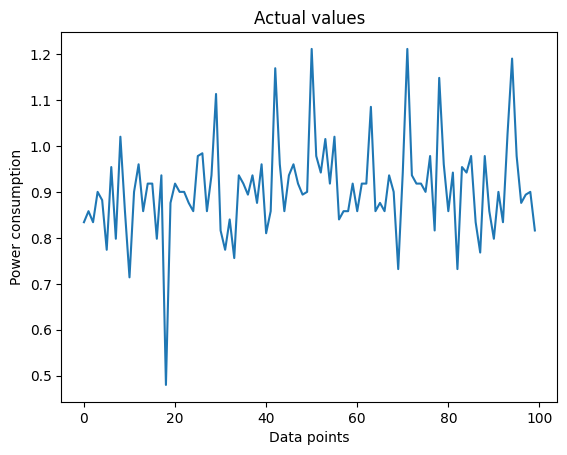

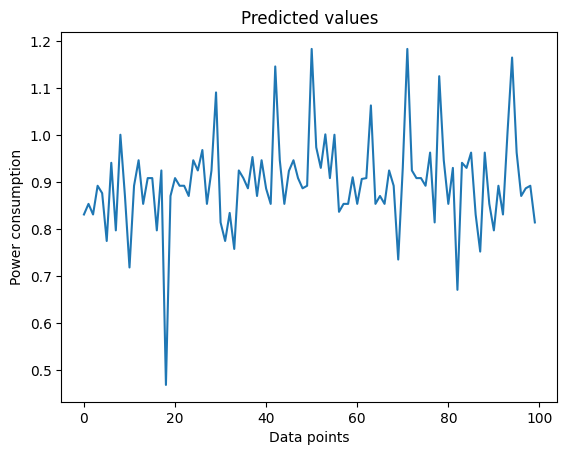

In [18]:
default_x_ticks = range(len(y_test))
plt.title('Actual values')
plt.xlabel('Data points')
plt.ylabel('Power consumption')
plt.plot(default_x_ticks[0:datapoints],y_test[0:datapoints])
#plt.xticks(default_x_ticks, x)
plt.show()

#predict
default_x_ticks = range(len(predict_y))
plt.title('Predicted values')
plt.xlabel('Data points')
plt.ylabel('Power consumption')
plt.plot(default_x_ticks[0:datapoints],predict_y[0:datapoints])
#plt.xticks(default_x_ticks, x)
plt.show()


In [19]:
# X_test[0:1]
# X_test[0:1].shape
# X_test[0:1].reshape(3,)
# ###
# arr = np.array([1,2,3])
# arr.shape

In [20]:
A = pd.Series(y_test[0:datapoints])
P = pd.Series(predict_y[0:datapoints])

In [21]:
# df_result = pd.concat([A, P], axis = 1)
# df_result = df_result.columns= ['Actual','Predicted']
# #df_result
df_result = pd.DataFrame ({ 'Actual': A, 'Predicted': P})

<AxesSubplot: >

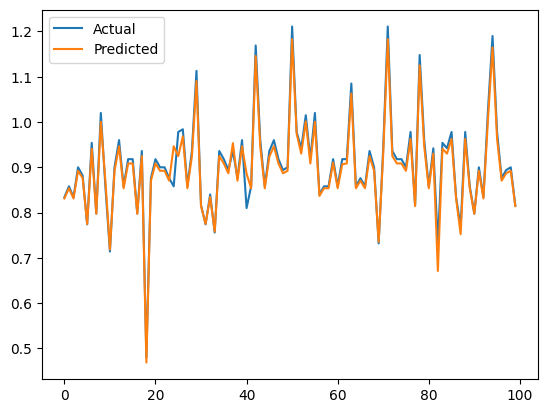

In [22]:
df_result.plot()

In [23]:
df_result

,Actual,Predicted
0,0.834,0.831208
1,0.858,0.853736
2,0.834,0.831208
3,0.900,0.892242
4,0.882,0.876475
...,...,...
95,0.978,0.962952
96,0.876,0.870524
97,0.894,0.886820
98,0.900,0.892242
